In [1]:
import numpy as np
import matplotlib.pyplot as plt

(500, 1)


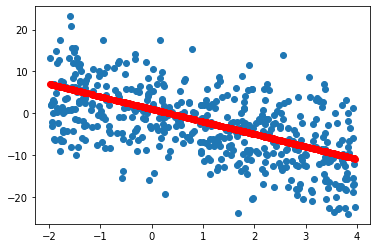

In [2]:
np.random.seed(42)

m=500

x=6*np.random.rand(m,1)-2
y1=-x*3+1
y=-x*3+7*np.random.randn(m,1)
print(np.shape(x))

plt.scatter(x, y)
plt.scatter(x, y1,color='r')
plt.show()

x=np.reshape(x,(-1,1))

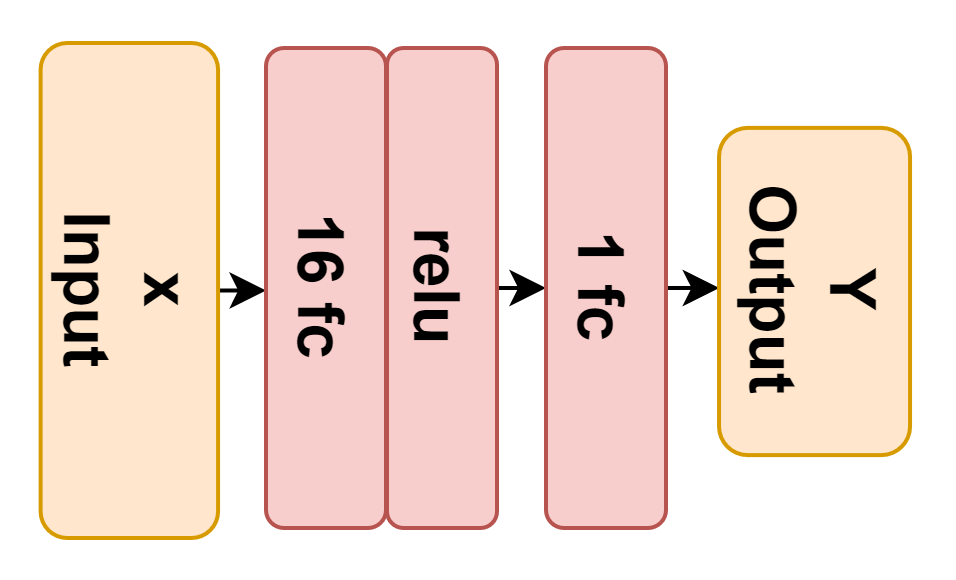

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
  tf.keras.Input(shape=(1)),
  tf.keras.layers.Dense(16, activation='relu'),
  #tf.keras.layers.Dense(32, activation='relu'),
  #tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(1, activation='linear')
])
model.compile(optimizer='adam', #SGD,RMSprop
              loss='mse',  #categorical_crossentropy
              metrics=['accuracy'])

model.fit(x, y, epochs=50)#batch_size=50
model.summary()



In [4]:
def plot_predictions(x_tr, y_tr, g,model):

    plt.scatter(x_tr, y_tr, s = 3, label = 'True Value')
    plt.scatter(x_tr, g, s=5,label = 'Prediction',color='r')
    print(np.shape(x_tr))
    x_test1=np.reshape(np.array([2.1]),(1,-1))
    y_test1=model.predict(x_test1)
    plt.scatter(x_test1, y_test1, s=100,label = 'test_1',color='y')
    x_test2=np.reshape(np.array([-1.7]),(1,-1))
    y_test2=model.predict(x_test2)
    plt.scatter(x_test2, y_test2, s=100,label = 'test_2',color='g')
    plt.legend()

    plt.show()

16/16 [==============================] - 0s 2ms/step
(500, 1)
1/1 [==============================] - 0s 18ms/step


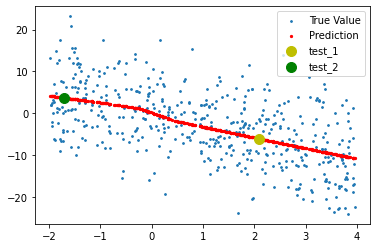

In [5]:
g=model.predict(x)
plot_predictions(x, y, g,model)

In [10]:
weights = model.get_weights()
print(np.shape(weights))
print(weights[0])
print(weights[1].shape)
print(weights[2].shape)
print(weights[3].shape)

(4,)
[[-0.08519781  0.78610355 -0.18396546  1.0688838  -0.18836884  0.03468972
   0.8677456   0.12502939  0.6924595  -0.4939216  -0.20862576 -0.77858466
  -0.47051966 -0.1252989  -0.719397    0.01772239]]
(16,)
(16, 1)
(1,)


In [7]:
model.save('test.h5')
new_model = tf.keras.models.load_model('test.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.save_weights('test1')

new_model = tf.keras.models.Sequential([
  tf.keras.Input(shape=(1)),
  tf.keras.layers.Dense(16, activation='relu'),
  #tf.keras.layers.Dense(32, activation='relu'),
  #tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(1, activation='linear')
])

new_model.load_weights('test1')
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                32        
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________
